<table align="left" width=100%>
    <tr>
        <td width="20%">
            <img src="GL-2.png">
            <img src="faculty.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                  <b> Post Read <br> (Week 4) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

## Table of Content

1. **[Import Libraries](#lib)**

2. **[Z Proportion Test](#prop)**
    - 2.1 - **[One Sample Test](#1_p)**
    - 2.2 - **[Two Sample Test](#2_p)**
3. **[Non-parametric Tests](#non_para)**
    - 3.1 - **[Wilcoxon Signed Rank Test](#1samp)**
    - 3.2 - **[Wilcoxon Rank Sum ](#w_rank)**
    - 3.3 - **[Mann-Whitney U Test](#m_w)**

<a id="lib"></a>
# 1. Import Libraries

**Let us import the required libraries.**

In [ ]:
# import 'pandas' 
import pandas as pd 

# import 'numpy' 
import numpy as np

# import subpackage of matplotlib
import matplotlib.pyplot as plt

# import 'seaborn'
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import statsmodels
import statsmodels.api as sm

# import 'stats' package from scipy library
from scipy import stats

# import statistics to perform statistical computations
import statistics

# to test the normality 
from scipy.stats import shapiro

# import a library to perform Z-test
from statsmodels.stats import weightstats as stests

In [ ]:
# set the plot size using 'rcParams'
# once the plot size is set using 'rcParams', it sets the size of all the forthcoming plots in the file
# pass width and height in inches to 'figure.figsize' 
plt.rcParams['figure.figsize'] = [15,8]

<a id="prop"></a>
# 2. Z Proportion Test

<a id="1_p"></a>
## 2.1 One Sample Test

Perform one sample Z test for the population proportion. We compare the population proportion ($P$) with a specific value ($P_{0}$).

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: P = P_{0}$ or $P \geq P_{0}$ or $P \leq P_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: P \neq P_{0}$ or $P < P_{0}$ or $P > P_{0}$</strong></p>

The test statistic for proportion Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{p -  P_{0}}{\sqrt{\frac{P_{0}(1-P_{0})}{n}}}$</strong></p>

Where, <br>
$p$: Sample proportion<br>
$n$: Sample size

Under $H_{0}$, the test statistic follows a standard normal distribution.

### Example:

#### 1. In previous years, people believed that at most 80% of male students score more than 50 marks out of 100 in Mathematics. Perform a test to check whether this percentage is more than 80. Consider the level of significance as 0.05.

Consider the sample of math scores of male students available in the CSV file `StudentsPerformance.csv`.

In [ ]:
# read the students performance data 
df_student = pd.read_csv('StudentsPerformance.csv')

# display the first two observations
df_student.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group B,standard,none,89,55,56,200,Nature Learning
1,female,group C,standard,completed,55,63,72,190,Nature Learning


In [ ]:
# total number of male students 
total_male = len(df_student[(df_student['gender'] == 'male')])

# consider the males with math score greater than 50
male_marks_gt_50 = df_student[(df_student['gender'] == 'male') & (df_student['math score'] > 50)]

# obtain the number of male students with math score greater than 50 
num_male_marks_gt_50 = len(male_marks_gt_50)

# calculate sample proportion
p_samp = num_male_marks_gt_50/total_male

The null and alternative hypothesis is:

H<sub>0</sub>: $P \leq 0.8$<br>
H<sub>1</sub>: $P > 0.8$ 

Here ⍺ = 0.05, for a one-tailed test calculate the critical z-value.

In [ ]:
# calculate the z-value for 95% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if z is greater than 1.64 then we reject the null hypothesis.

In [ ]:
# hypothesized proportion
hypo_p = 0.8 

# calculate test statistic value for 1 sample proportion test
z_prop = (p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / total_male)

print('Test statistic:', z_prop)

Test statistic: 4.163394160018601


In [ ]:
# calculate the corresponding p-value for the test statistic
# use 'sf()' to calculate P(Z > z_prop)
p_value = stats.norm.sf(z_prop)

print('p-value:', p_value)

p-value: 1.5677570141208797e-05


In [ ]:
# calculate the 95% confidence interval
# pass the sample proportion to the parameter, 'loc'
# pass the scaling factor (((p_samp*(1-p_samp))/n)^0.5) to the parameter, 'scale'
interval = stats.norm.interval(0.95, loc = p_samp, scale = np.sqrt((p_samp*(1-p_samp))/total_male))

print('95% confidence interval for population proportion is', interval)

95% confidence interval for population proportion is (0.8463611028151683, 0.9051916922158876)


Here the z-score is greater than 1.64, the p-value is less than 0.05, also the confidence interval does not contain the value in the null hypothesis (i.e. 0.8). Thus, we reject the null hypothesis and we have enough evidence to conclude that the percentage of male students scoring more than 50 marks in Mathematics is more than 80%.

Let us plot the acceptance and rejection region for a right-tailed test with 95% confidence.

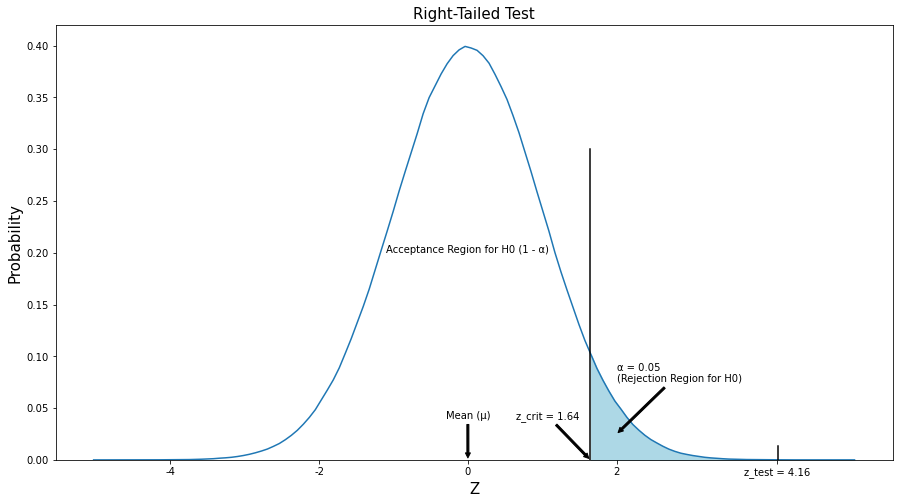

In [ ]:
# consider a random variable 'X' that follows a standard normal distribution 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(size = 2000000, random_state = 5)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.norm.isf()' to calculate the critical z-value for alpha = 0.05
# pass the value of 'alpha' to the parameter 'q'
z = stats.norm.isf(q = 0.05)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-proportion value
x, y = [z_prop, z_prop], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'Mean (μ)', xy = (0, 0), xytext = (-0.3, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α = 0.05\n(Rejection Region for H0)', xy = (2, 0.025), xytext = (2, 0.075), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0), xytext = (z-1, 0.04), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.1, y = 0.2, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-4, -2, 0, 2, round(z_prop,2)], 
           labels = [-4, -2, 0, 2, 'z_test = '+str(round(z_prop,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Right-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the rejection region, which implies we reject $H_{0}$ and conclude the percentage of male students scoring more than 50 marks in Mathematics is more than 80%.

#### 2. From a sample of 361 business owners had gone into bankruptcy due to recession. On taking a survey, it was found that 105 of them had not consulted any professional for managing their finance before opening the business. Test the null hypothesis that at most 25% of all businesses had not consulted before opening the business. Test the claim using p-value technique. Use α = 0.05.

The null and alternative hypothesis is:

H<sub>0</sub>: $P \leq 0.25$<br>
H<sub>1</sub>: $P > 0.25$ 

In [ ]:
# sample size
n = 361

# number of business owners that did not consult before
x = 105

# sample proportion
p_samp = x / n

# hypothesized proportion
hypo_p = 0.25

# calculate test statistic value for 1 sample proportion test
z_prop = (p_samp - hypo_p) / np.sqrt((hypo_p * (1 - hypo_p)) / n)

print('Test statistic:', z_prop)

Test statistic: 1.7928245201151534


In [ ]:
# calculate the corresponding p-value for the test statistic
# use 'sf()' to calculate P(Z > z_prop)
p_value = stats.norm.sf(z_prop)

print('p-value:', p_value)

p-value: 0.03650049373124949


Here the p-value is less than 0.05. Thus, we reject the null hypothesis and conclude that at least 25% of all businesses had not consulted before starting the business.

<a id="2_p"></a>
## 2.2 Two Sample Test

Perform two sample Z test for the population proportion. We check the equality of population proportions $P_{1}$ and $P_{2}$.

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: P_{1} - P_{2} = P_{0}$ or $P_{1} - P_{2} \geq P_{0}$ or $P_{1} - P_{2} \leq P_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: P_{1} - P_{2} \neq P_{0}$ or $P_{1} - P_{2} < P_{0}$ or $P_{1} - P_{2} > P_{0}$</strong></p>

The test statistic for two sample proportion Z-test is given as:
<p style='text-indent:25em'> <strong> $Z = \frac{(p_{1} -  p_{2}) - P_{0}}{\sqrt{\bar{P}(1-\bar{P})(\frac{1}{n_{1}} + \frac{1}{n_{2}})}}$   $\hspace{2 cm} \bar{P} = \frac{n_{1}p_{1} + n_{2}p_{2}}{n_{1} + n_{2}}$ </strong></p>

Where, <br>
$p_{1}, p_{2}$: Samples proportions<br>
$P_{0}$: Hypothesized proportion<br>
$\bar{P}$: Proportion of pooled sample<br>
$n_{1}, n_{2}$: Samples sizes

### Example:

#### 1. A team of nutritionists believes that each institute provides 'standard' lunch to an equal proportion of students. A sample of students from institutes <i>Nature Learning</i> and <i>Speak Global Learning</i> is given. Consider the null hypothesis as equality of proportion with 0.1 level of significance.

Consider the sample data available in the CSV file `StudentsPerformance.csv`.

In [ ]:
# read the students performance data 
df_student = pd.read_csv('StudentsPerformance.csv')

# display the first two observations
df_student.head(2)

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,total score,training institute
0,female,group B,standard,none,89,55,56,200,Nature Learning
1,female,group C,standard,completed,55,63,72,190,Nature Learning


In [ ]:
# get the training institutes in the dataframe
df_student['training institute'].unique()

array(['Nature Learning', 'Speak Global Learning'], dtype=object)

The dataset contains the information about the students from two different institutes.

In [ ]:
# consider the students from Nature Learning institute
df_nl = df_student[df_student['training institute'] == 'Nature Learning']

# number of students from first institute
n_1 = len(df_nl)

# number of the students with standard lunch
lunch_std_1 = len(df_nl[df_nl['lunch'] == 'standard'])

# consider the students from Speak Global Learning institute
df_sg = df_student[df_student['training institute'] == 'Speak Global Learning']

# number of students from second institute
n_2 = len(df_sg)

# number of the students with standard lunch
lunch_std_2 = len(df_sg[df_sg['lunch'] == 'standard'])

The null and alternative hypothesis is:

H<sub>0</sub>: $P_{1} - P_{2} = 0$<br>
H<sub>1</sub>: $P_{1} - P_{2} \neq 0$ 

Here ⍺ = 0.1, for a two-tailed test calculate the critical z-value.

In [ ]:
# calculate the z-value for 90% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha/2' for a two-tailed test to the parameter 'q', here alpha = 0.1
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.1/2), 2))

print('Critical value for two-tailed Z-test:', z_val)

Critical value for two-tailed Z-test: 1.64


i.e. if z is less than -1.64 or greater than 1.64 then we reject the null hypothesis.

In [ ]:
# calculate test statistic value for two sample proportion test
# pass the number of students with standard lunch for both the institutes to the parameter, 'count'
# pass the size of both the samples to the parameter, 'nobs'
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([lunch_std_1, lunch_std_2]), 
                                             nobs = np.array([n_1, n_2]))

# print the value of test statstic and the corresponding p-value
print('Test statistic:', z_prop)
print('p-value:', p_val)

Test statistic: 0.7935300106078008
p-value: 0.4274690915859791


In [ ]:
# proportion of first sameple
p_1 = lunch_std_1/ n_1

# proportion of first sameple
p_2 = lunch_std_2/ n_2

# proportion of pooled sample
p_bar = (n_1*p_1 + n_2*p_2) / (n_1 + n_2)

# calculate the 90% confidence interval
# pass the difference in sample proportions to the parameter, 'loc'
# pass the scaling factor np.sqrt(p_bar(1-p_bar)(1/n_1 + 1/n_2)) to the parameter, 'scale'
a,b = stats.norm.interval(0.9, loc = p_1 - p_2, scale = np.sqrt(p_bar*(1-p_bar)*(1/n_1 + 1/n_2)))

print('90% confidence interval for population proportion is', interval)

90% confidence interval for population proportion is (0.8463611028151683, 0.9051916922158876)


Here the z-score is less than 1.64, the p-value is greater than 0.1, also the confidence interval contains the value in the null hypothesis (i.e. 0). Thus, we fail to reject (i.e. accept) the null hypothesis and we do not have enough evidence to conclude that the proportion of students with standard lunch is different.

Let us plot the acceptance and rejection region for a two-tailed test with 90% confidence.

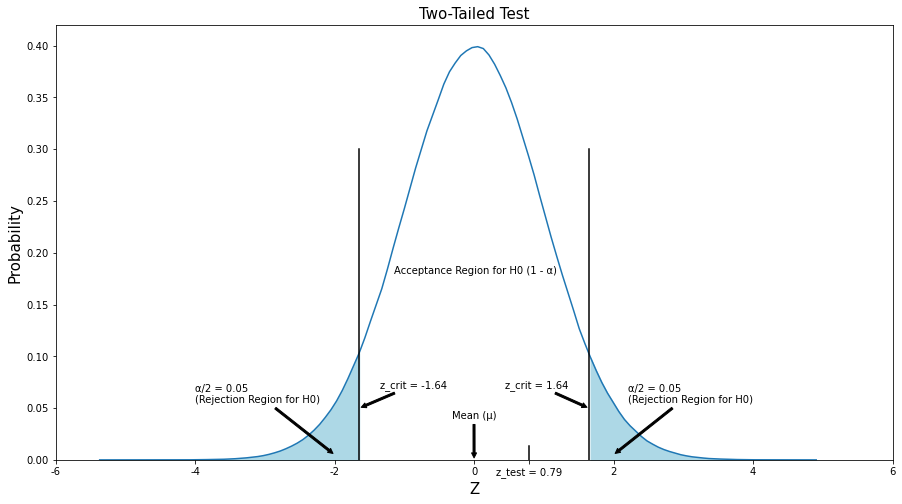

In [ ]:
# consider a random variable 'X' that follows a standard normal distribution 
# pass the required number of observations to the parameter, 'size'
# set 'random_state' to obtain the same observations every time you run the code 
X = stats.norm.rvs(size = 2000000, random_state = 10)

# plot the distribution of X
# pass the data to the parameter, 'a'
# 'hist=False' does not return the histogram 
# 'cumulative=False' in 'kde_kws' does not return the cumulative kernel density estimator
ax = sns.distplot(a = X, hist = False, kde_kws = dict(cumulative=False))

# set the limit for y-axis
plt.ylim(0, 0.42)

# use 'stats.norm.isf()' to calculate the critical z-value for alpha = 0.1
# pass the value of 'alpha/2' to the parameter 'q' for a two-tailed test
z = stats.norm.isf(q = 0.1/2)

# plot a vertical line at z-value
x, y = [z, z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at -(z-value)
x, y = [-z, -z], [0, 0.3]
plt.plot(x, y, color = 'black')

# plot a vertical line at z-test value
x, y = [z_prop, z_prop], [0, 0.013]
plt.plot(x, y, color = 'black')

# add the color to the right of the z-value and left of -(z-value)
# get the data for x and y axes
l1 = ax.lines[0]
x1 = l1.get_xydata()[:,0]
y1 = l1.get_xydata()[:,1]

# fill the color for the region where x-values are greater than the critical z-value
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 >= z], y1[x1 >= z], color = 'lightblue')

# fill the color for the region where x-values are less than -(z-value)
# pass the condition to shade the required region
# pass the required color to the parameter, 'color'
ax.fill_between(x1[x1 <= -z], y1[x1 <= -z], color = 'lightblue')

# use 'annonate' function to draw an arrow between points xy and xytext
# 's' is a argument to write text
# we can change the facecolor and arrowstyle; this is only for representation purpose
plt.annotate(s = 'Mean (μ)', xy = (0, 0), xytext = (-0.32, 0.04), arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.05\n(Rejection Region for H0)', xy = (2, 0.005), xytext = (2.2, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'α/2 = 0.05\n(Rejection Region for H0)', xy = (-2, 0.005), xytext = (-4, 0.055), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(z,2)), xy = (z, 0.05), xytext = (z-1.2, 0.07), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

plt.annotate(s = 'z_crit = '+ str(round(-z,2)), xy = (-z, 0.05), xytext = (-z+0.3, 0.07), 
             arrowprops = dict(facecolor = 'black', arrowstyle = 'simple'))

# use below code to print the values in the graph
# 'x' and 'y' gives position of the text
# 's' is the text 
plt.text(x = -1.15, y = 0.18, s = 'Acceptance Region for H0 (1 - α)')

# assign the x-axis labels
# pass the position of labels to the parameter, 'ticks'
# pass the required labels to the parameter, 'labels'
plt.xticks(ticks = [-6, -4, -2, 0, 2, 4, 6, round(z_prop,2)], 
           labels = [-6, -4, -2, 0, 2, 4, 6, 'z_test = '+str(round(z_prop,2))])

# set plot and axes labels
# set text size using 'fontsize'
plt.xlabel('Z', fontsize = 15)
plt.ylabel('Probability', fontsize = 15)
plt.title('Two-Tailed Test', fontsize = 15)

# display the plot
plt.show()

The above plot shows that the test statistic value is in the acceptance region, that implies we fail to reject (i.e. accept) $H_{0}$.

#### 2. Steve owns a kiosk where he sells two magazines - A and B in a month. He buys 100 copies of magazine A out of which 78 were sold and 70 copies of magazine B out of which 65 were sold. Is there enough evidence to say that magazine is B is more popular? Test the claim using p-value technique with α = 0.05.

The null and alternative hypothesis is:

H<sub>0</sub>: $P_{1} \geq P_{2}$<br>
H<sub>1</sub>: $P_{1} < P_{2}$ 

In [ ]:
# copies of magazine A 
num_A = 100

# copies of magazine B
num_B = 70

# number of copies sold for magazine A  
x_A = 78

# number of copies sold for magazine B 
x_B = 65

# calculate test statistic value for two sample proportion test
# pass the copies sold for both the magazines to the parameter, 'count'
# pass the size of both the samples to the parameter, 'nobs'
# pass the one-tailed condition to the parameter, 'alternative'
z_prop, p_val = sm.stats.proportions_ztest(count = np.array([x_A, x_B]), 
                                             nobs = np.array([num_A, num_B]),  
                                             alternative = 'smaller')

# print the value of test statistic and the corresponding p-value
print('Test statistic:', z_prop)
print('p-value:', p_val)

Test statistic: -2.60830803458311
p-value: 0.004549551600547303


Here the p-value is less than 0.05. Thus, we reject the null hypothesis and conclude that there is enough evidence to say that magazine B is more popular.

<a id="non_para"></a>
# 3. Non-parametric Tests

Parametric tests are the test in which the distribution of the sample is known. The non-parametric tests can be used when the assumptions of parametric tests are not satisfied.

`Non-parametric tests` do not require any assumptions about the distribution of the population from which the sample is taken. These tests can be applied to the ordinal/ nominal data. A non-parametric test can be performed on the data containing outliers. The observations in the sample are assumed to be independent for a non-parametric test.

<a id="1samp"></a>
## 3.1 Wilcoxon Signed Rank Test

### 1. One-sample Test

Wilcoxon signed rank test is used to compare the median (M) of a sample to a specific value ($M_{0}$). This test is a non-parametric alternative to the one-sample t-test which is used to compare the mean of population with a specific value.

The null and alternative hypothesis is given as:

<p style='text-indent:25em'> <strong> $H_{0}: M = M_{0}$ or $M \geq M_{0}$ or $M \leq M_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: M \neq M_{0}$ or $M < M_{0}$ or $M > M_{0}$</strong></p>

To perform the test, arrange the sample into ascending order and calculate the difference between the sample point and $M_{0}$. Rank the absolute value of differences using the integers starting from 1 giving the average of ranks to the tied difference. 

In python, use the `wilcoxon()` from scipy library to perform the test. 

For a one-sided test, the test statistic is given as:
<p style='text-indent:25em'> <strong> $T^{+} = $ Sum of positive signed ranks</strong></p>

For a two-sided test, the test statistic is given as:
<p style='text-indent:25em'> <strong> $T = min(T^{+}, T^{-})$</strong></p>

Where<br>
$T^{+} = $ Sum of positive signed ranks<br>
$T^{-} = $ Sum of negative signed ranks

### Example:

#### 1. A company manufactures auto ancillaries. One of them is steel rods with median diameter 10cm. A sample of 10 rods randomly selected from the production process gives the following results. Test the hypothesis that the median of the population has reduced. Use α = 0.05

given data:

    diameter = [9.1, 10.1, 9.9, 9.9, 10, 9.8, 9.7, 9.8, 9.9, 8.6]

The null and alternative hypothesis is:

H<sub>0</sub>: $M \geq 10$<br>
H<sub>1</sub>: $M < 10$ 

In [ ]:
# given diameters
diameter = np.array([9.1, 10.1, 9.9, 9.9, 10, 9.8, 9.7, 9.8, 9.9, 8.6])

# hypothesized median
M_0 = 10

# calculate the difference between diameter and M_0
diff = diameter - M_0

# perform wilcoxon signed rank test
# pass the differnces to the parameter, 'x'
# pass the one-tailed condition to the parameter, 'alternative'
test_stat, p_value = stats.wilcoxon(x = diff, alternative = 'less')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 2.5
p-value: 0.008364861494636245


Here the p-value is less than 0.05, thus we reject the null hypothesis and conclude that the median of population has reduced.

#### 2. The Sweet Life company that produces hand sanitizers states that the in sanitizers the median percentage of alcohol is 0.82. A sample of 6 bottles is selected to test the claim that the median percentage of alcohol is not 0.82. Use  α = 0.1

Given data:

        alc_per = [0.32, 0.43, 0.38, 0.35, 0.85, 0.79]

The null and alternative hypothesis is:

H<sub>0</sub>: $M = 0.82$<br>
H<sub>1</sub>: $M \neq 0.82$ 

In [ ]:
# given alcohol percentage
alc_per = np.array([0.32, 0.43, 0.38, 0.35, 0.83, 0.79])

# hypothesized median
M_0 = 0.82

# calculate the difference between sample percentages and M_0
diff = alc_per - M_0

# perform wilcoxon signed rank test
# pass the differnces to the parameter, 'x'
# pass the two-tailed condition to the parameter, 'alternative'
test_stat, p_value = stats.wilcoxon(x = diff, alternative = 'two-sided')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 1.0
p-value: 0.0625


Here the p-value is less than 0.1, thus we reject the null hypothesis and conclude that the median percentage of alcohol in hand sanitizers produced by Sweet Life comapny is not 0.82.

### 2. Two-sample Paired Test

Wilcoxon signed rank test can be used to compare medians of paired data. This test is a non-parametric alternative to the paired t-test. Let us consider variables X and Y. The median of the difference between the two paired samples is denoted by $M_{d}$. Where the difference between two samples is given as, $d_{i} = x_{i} - y_{i}$

The null and alternative hypothesis is given as:
<p style='text-indent:25em'> <strong> $H_{0}: M_{d} = M_{0}$ or $M_{d} \geq M_{0}$ or $M_{d} \leq M_{0}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: M_{d} \neq M_{0}$ or $M_{d} < M_{0}$ or $M_{d} > M_{0}$</strong></p>

To perform the test, arrange the sample into ascending order and calculate the difference between the two paired samples. Rank the absolute value of differences using the integers starting from 1 giving the average of ranks to the tied difference.

In python, use the `wilcoxon()` from scipy library to perform the test. 

For a one-sided test, the test statistic is given as:
<p style='text-indent:25em'> <strong> $T^{+} = $ Sum of positive signed ranks</strong></p>

For a two-sided test, the test statistic is given as:
<p style='text-indent:25em'> <strong> $T = min(T^{+}, T^{-})$</strong></p>

Where<br>
$T^{+} = $ Sum of positive signed ranks<br>
$T^{-} = $ Sum of negative signed ranks

### Example:

#### 1. The weights (in kg) of five hens before and after a special diet of millets was given. Test the hypothesis that the new millet diet has increased the weight of the hens at a 5% level of significance.

        before_wt = [2.7, 1.1, 1.4, 0.9, 0.9] 
        after_wt = [1.3, 1.4, 1.1, 1.3, 1.9] 

The null and alternative hypothesis is:

H<sub>0</sub>: $M_{d} \geq 0$<br>
H<sub>1</sub>: $M_{d} < 0$ 

In [ ]:
# given weights
before_wt = [2.7, 1.1, 1.4, 0.9, 0.9]
after_wt = [1.3, 1.4, 1.1, 1.3, 1.9]

# perform wilcoxon signed rank test for paired data
# pass the before and after weights to the parameter, 'x' and 'y' respectively
# pass the one-tailed condition to the parameter, 'alternative'
test_stat, p_value = stats.wilcoxon(x = before_wt, y = after_wt, alternative = 'less')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 6.5
p-value: 0.40625


Here the p-value is more than 0.05, thus we fail to reject (i.e. accept) the null hypothesis and conclude that there is not enough evidence to say that the new millets diet has increased the weight.

<a id="w_rank"></a>
## 3.2 Wilcoxon Rank Sum Test

This test is used to compare the medians of unpaired data. 

Consider a sample of size $n_{1}$ from a variable `X` with median $m_{1}$ and another sample of size $n_{2}$ from variable `Y` with median $m_{2}$. Let, $M = m_{1} - m_{2}$

The null and alternative hypothesis is given as:
<p style='text-indent:25em'> <strong> $H_{0}: M = 0$ or $M \geq 0$ or $M \leq 0$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: M \neq 0$ or $M < 0$ or $M > 0$</strong></p>


The test statistic is given as:
<p style='text-indent:25em'> <strong> $T = $ Sum of ranks assigned to X</strong></p>

If the sample sizes ($n_{1}, n_{2}$) are large ($\geq 15$) then the distribution of $T^{*}$ follows a standard normal distribution  and $T^{*} = \frac{T - \frac{n_{1}(N+1)}{2}}{\sqrt{\frac{n_{1}n_{2}(N+1)}{12}}}$ 

### Examples:

#### 1. The lengths of time in minutes spent in the operating room by 9 patients undergoing the same operating method. 4 patients are from hospital A and 5 are from hospital B. Based on given data can we conclude that for the sample operative method, patients in hospital B tend to be longer than the patients in hospital A. Use level of significance as 0.05
Given data:

    A = [32, 31, 33, 46]
    B = [49, 20, 58, 55, 52]

The null and alternative hypothesis is:

H<sub>0</sub>: $M \geq 0$ <br>
H<sub>1</sub>: $M < 0$

The `ranksums()` in scipy library calculates the test statistic using the normal approximation. Thus, for $\alpha$ = 0.05, calculate z-value for one sided test. 

In [ ]:
# calculate the z-value for 95% of confidence level
# use 'stats.norm.isf()' to find the z-value corresponding to the upper tail probability 'q'
# pass the value of 'alpha' to the parameter 'q', here alpha = 0.05
# use 'round()' to round-off the value to 2 digits
z_val = np.abs(round(stats.norm.isf(q = 0.05), 2))

print('Critical value for one-tailed Z-test:', z_val)

Critical value for one-tailed Z-test: 1.64


i.e. if the value of test statistic is greater than 1.64 then we reject the null hypothesis.

In [ ]:
# given data
A = [32, 31, 33, 46]
B = [49, 20, 58, 55, 52]

# compute test statistic and corresponding p-value for two-tailed test
test_stat, p_value = stats.ranksums(A, B)

In our example, the hypothesis test is one-tailed. Thus, we divide the two-tailed probability by 2 to obtain the one-tailed probability.

In [ ]:
# divide the p-value by 2
req_p_val = p_value/2

# print the test statistic value and corresponding p-value
print('Test Statistic:', test_stat)
print('p-value:', req_p_val)

Test Statistic: -1.4696938456699067
p-value: 0.0708223451475684


Here the test statistic is less than -1.64, also the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and we can not conclude that the patients in hospital B tend to be longer than the patients in hospital A

<a id="m_w"></a>
## 3.3 Mann-Whitney U Test

It is a non-parametric test that compares the distributions of independent populations. This test can be used as a non-parametric alternative for the unpaired t-test. 
Consider a sample of size $n_{1}$ from a random variable X and another sample of size $n_{2}$ from a random variable Y.

The null and alternative hypothesis is given as:
<p style='text-indent:25em'> <strong> $H_{0}: F_{X} = F_{Y}$ or $F_{X} \geq F_{Y}$ or $F_{X} \leq F_{Y}$</strong></p>
<p style='text-indent:25em'> <strong> $H_{1}: F_{X} \neq F_{Y}$ or $F_{X} < F_{Y}$ or $F_{X} > F_{Y}$</strong></p>

Here, $F_{X}, F_{Y}$ are distributions of X and Y. Thus, the two-sided null hypothesis is that the samples are drawn from two identical distributions.

We can perform this test using both the direct and indirect method. The test statistic for the indirect method is given as: $min(U_{1}, U_{2})$

Where,<br>
<p style='text-indent:25em'> <strong> $U_{1} = n_{1}n_{2} + \frac{n_{1}(n_{1}+1)}{2} - R_{1}$</strong></p>
<p style='text-indent:25em'> <strong> $U_{2} = n_{1}n_{2} + \frac{n_{2}(n_{2}+1)}{2} - R_{2}$</strong></p>

$R_{1}$: Sum of the ranks for the X<br>
$R_{2}$: Sum of the ranks for the Y<br>
$n_{1}$: Sample size of X<br>
$n_{2}$: Sample size of Y

### Examples:

#### 1. Two companies EyeCare and VisionFirst produces timolol eye drops. The sample of 5 bottles from both companies is selceted and the content of timolol maleate in milligram is recorded. Perform Mann-Whitney U test to test whether the amount of timolol maleate is different for both the companies. Use level of significance as 0.05.

Given data:

        eyecare = [6.18, 6.45, 6.21, 8.68, 8.45]
        visionfirst = [5.8, 7.8, 6.2, 5.9, 6.2]

Let $F_{X}$ be the distribution of timolol maleate in the eyedrops of EyeCare company and $F_{Y}$ be the distribution of timolol maleate in the eyedrops of VisionFirst company.

Where,<br>

The null and alternative hypothesis is:

H<sub>0</sub>: $F_{X} = F_{Y}$ <br>
H<sub>1</sub>: $F_{X} \neq F_{Y}$

Let us check the normality of the timolol maleate in the eyedrops of EyeCare company.

In [ ]:
# given data
eyecare = [6.18, 6.45, 6.21, 8.68, 8.45]

# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the timolol maleate in the eyedrops of EyeCare company to perform the test
stat, p_value = shapiro(eyecare)

# print the corresponding p-value 
print('P-Value:', p_value)

P-Value: 0.04114510864019394


From the above result, we can see that the p-value is less than 0.05, thus we can say that the  timolol maleate in the eyedrops of EyeCare company is not normally distributed.

Let us check the normality of the timolol maleate in the eyedrops of VisionFirst company.

In [ ]:
# given data
visionfirst = [5.8, 7.8, 6.2, 5.9, 6.2]

# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the  timolol maleate in the eyedrops of VisionFirst company to perform the test
stat, p_value = shapiro(visionfirst)

# print the corresponding p-value 
print('P-Value:', p_value)

P-Value: 0.025034615769982338


From the above result, we can see that the p-value is less than 0.05, thus we can say that the timolol maleate in the eyedrops of VisionFirst company is not normally distributed.

In [ ]:
# compute test statistic and corresponding p-value for two-tailed test
test_stat, p_value = stats.mannwhitneyu(eyecare, visionfirst, alternative = 'two-sided')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 20.0
p-value: 0.14245669739409866


Here the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and we can conclude that the amount of timolol maleate is same for both the companies.

#### 2. The lengths of time in minutes spent in the operating room by 9 patients undergoing the same operating method. 4 patients are from hospital A and 5 are from hospital B. Based on given data can we conclude that for the sample operative method, patients in hospital B tend to be longer than the patients in hospital A. Use level of significance as 0.05.
Given data:

    A = [32, 31, 33, 46]
    B = [49, 20, 58, 55, 52]

Let $F_{X}$ be the distribution of time spent by patient in hospital A in operating room and $F_{Y}$ be the distribution of time spent by patient in hospital B in operating room.

The null and alternative hypothesis is:

H<sub>0</sub>: $F_{X} \geq F_{Y}$ <br>
H<sub>1</sub>: $F_{X} < F_{Y}$

Let us check the normality of the time spent by the patients in the hospital A.

In [ ]:
# given data
A = [32, 31, 33, 46]

# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the time spent by the patients in the hospital A to perform the test
stat, p_value = shapiro(A)

# print the corresponding p-value 
print('P-Value:', p_value)

P-Value: 0.0286051444709301


From the above result, we can see that the p-value is less than 0.05, thus we can say that the time spent by patients in hospital A are not normally distributed.

Let us check the normality of the time spent by the patients in the hospital B.

In [ ]:
# given data
B = [49, 20, 58, 55, 52]

# perform Shapiro-Wilk test to test the normality
# shapiro() returns a tuple having the values of test statistics and the corresponding p-value
# pass the time spent by the patients in the hospital B to perform the test
stat, p_value = shapiro(B)

# print the corresponding p-value 
print('P-Value:', p_value)

P-Value: 0.03407324105501175


From the above result, we can see that the p-value is less than 0.05, thus we can say that the time spent by patients in hospital B are not normally distributed.

In [ ]:
# compute test statistic and corresponding p-value for one-tailed test
test_stat, p_value = stats.mannwhitneyu(A, B, alternative = 'less')

# print the test statistic and corresponding p-value
print('Test statistic:', test_stat)
print('p-value:', p_value)

Test statistic: 4.0
p-value: 0.08895479749349122


Here the p-value is greater than 0.05. Thus we fail to reject (i.e. accept) the null hypothesis and we can not conclude that the patients in hospital B tend to be longer than the patients in hospital A.